# Extracción de Datos de CO2 y Temperatura

In [1]:
# Importamos las bibliotecas que vamos a usar
#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
import os

In [2]:
# Definimos los arrays principales que vamos a usar
tiempos = np.array([])
co2 = np.array([])    # (ppm)

estado_valvula_co2_1 =  np.array([])
estado_valvula_compost_1 = np.array([])
estado_valvula_co2_2 =  np.array([])
estado_valvula_compost_2 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_3 =  np.array([])
estado_valvula_compost_3 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_4 =  np.array([])
estado_valvula_compost_4 = np.array([])
temp_suncho = np.array([])

temp_suncho = np.array([])

temp_compost_1 = np.array([])
temp_compost_2 = np.array([])
temp_compost_3 = np.array([])
temp_compost_4 = np.array([])

estado_suncho = np.array([])    # Apagado: 0, Prendido: 1

In [3]:
# Definamos la carpeta con las mediciones como PATH
PATH = f"./measurements/full-x4/2022-03-25_07-30-02"

# Creamos una carpeta para las figuras (si es que no existe)
if not os.path.isdir(f"{PATH}/figuras"):
    os.makedirs(f"{PATH}/figuras")

In [4]:
# Veamos el primer archivo csv como ejemplo
df0 = pd.read_csv(f"{PATH}/data_0.csv")
display(df0)

,Date_Time,CO2,Estado_Valvula_CO2_1,Estado_Valvula_Compost_1,Estado_Valvula_CO2_2,Estado_Valvula_Compost_2,Estado_Valvula_CO2_3,Estado_Valvula_Compost_3,Estado_Valvula_CO2_4,Estado_Valvula_Compost_4,Temp_Compost_1,Temp_Compost_2,Temp_Compost_3,Temp_Compost_4,Temp_Suncho,Estado_Suncho
0,25/03/2022_07:30:10,1039,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,65.19,51.06,42.94,55.56,40.44,Prendido
1,25/03/2022_07:30:16,1040,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,65.19,51.06,43.00,55.56,40.38,Prendido
2,25/03/2022_07:30:22,1040,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,65.19,51.13,43.00,-15.06,40.44,Prendido
3,25/03/2022_07:30:28,1039,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,65.19,51.06,43.00,55.44,40.38,Prendido
4,25/03/2022_07:30:34,1036,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,65.19,51.06,42.94,55.38,40.38,Prendido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,25/03/2022_07:39:22,871,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,64.94,50.75,42.81,53.63,40.00,Prendido
95,25/03/2022_07:39:28,871,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,64.94,50.75,42.81,53.44,39.94,Prendido
96,25/03/2022_07:39:34,871,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,64.87,50.81,42.75,53.44,39.94,Prendido
97,25/03/2022_07:39:39,871,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,64.94,50.75,42.81,53.31,39.94,Prendido


In [5]:
len(df0)

99

In [6]:
# Antes de llenar los arrays vamos a necesitar una función que convierta un tiempo en el formato que usamos en tiempo absoluto para poder comparar las mediciones entre sí
def convertirTiempo(t_i, t):
    dia = int(t[:2])
    mes = int(t[3:5])
    ano = int(t[6:10])
    hora = int(t[11:13])
    minuto = int(t[14:16])
    segundo = int(t[17:])
    
    t_abs = segundo + 60 * minuto + (60 ** 2) * hora + 24 * (60 ** 2) * dia + 30 * 24 * (60 ** 2) * mes + 12 * 30 * 24 * (60 ** 2) * ano
    return t_abs - t_i


# Definamos el tiempo inicial
datetime0 = np.transpose(df0["Date_Time"].to_numpy())[0]
t_i = convertirTiempo(0, datetime0)
print(datetime0)

25/03/2022_07:30:10


In [7]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir(PATH):
    if file.endswith(".csv"):
        n += 1

print(n)

176


In [8]:
# Llenemos las listas con los datos
for i in range(n-1):
    df = pd.read_csv(f"{PATH}/data_{i}.csv")

    # CO2
    co2 = np.concatenate((co2, np.transpose(df["CO2"].to_numpy())))

    # Tiempo
    for t in np.transpose(df["Date_Time"].to_numpy()):
        tiempos = np.concatenate((tiempos, np.array([convertirTiempo(t_i, t)])))
        
    # Temperaturas
    temp_suncho = np.concatenate((temp_suncho, np.transpose(df["Temp_Suncho"].to_numpy())))
    temp_compost_1 = np.concatenate((temp_compost_1, np.transpose(df["Temp_Compost_1"].to_numpy())))
    temp_compost_2 = np.concatenate((temp_compost_2, np.transpose(df["Temp_Compost_2"].to_numpy())))
    temp_compost_3 = np.concatenate((temp_compost_3, np.transpose(df["Temp_Compost_3"].to_numpy())))
    temp_compost_4 = np.concatenate((temp_compost_4, np.transpose(df["Temp_Compost_4"].to_numpy())))
    
    
    # Estados
    for e in np.transpose(df["Estado_Valvula_CO2_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([1])))
        else:
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([1])))
        else:
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_CO2_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([1])))
        else:
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([1])))
        else:
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([0])))

    for e in np.transpose(df["Estado_Valvula_CO2_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([1])))
        else:
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([1])))
        else:
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([0])))
       
    for e in np.transpose(df["Estado_Valvula_CO2_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([1])))
        else:
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([1])))
        else:
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([0])))   
    
    
    for e in np.transpose(df["Estado_Suncho"].to_numpy()):
        if e == "Prendido":
            estado_suncho = np.concatenate((estado_suncho, np.array([1])))
        else:
            estado_suncho = np.concatenate((estado_suncho, np.array([0])))

In [5]:
#co2[np.where(co2 == "!Warning: Clearing Byte: 154")[0][0]] = -1
#co2[np.where(co2 == "!Warning: Clearing Byte: 49")[0][0]] = -1

In [9]:
# Encuentro dónde se hace la danza de las válvulas, para hacerle una marca en los gráficos
# Parece hincha pelotas así como está ahora, pero después lo voy a necesitar así que me conviene definirlo así

pos1 = np.where(np.diff(estado_valvula_co2_1) == 1)[0].tolist() # encuentro el número de posición del primer momento de la danza
pos2 = np.where(np.diff(estado_valvula_co2_2) == 1)[0].tolist() # y así con los demás
pos3 = np.where(np.diff(estado_valvula_co2_3) == 1)[0].tolist()
pos4 = np.where(np.diff(estado_valvula_co2_4) == 1)[0].tolist()
pos5 = np.where(np.diff(estado_valvula_compost_4) == 1)[0].tolist()

pos = pos1 + pos2 + pos3 + pos4 + pos5 # los guardo ordenados
pos.sort()

danza = [] # guardo los tiempos para graficarlos y visualizarlos rápidamente
for i in range(len(pos)):
    danza.append(tiempos[pos[i]])

# Gráficos

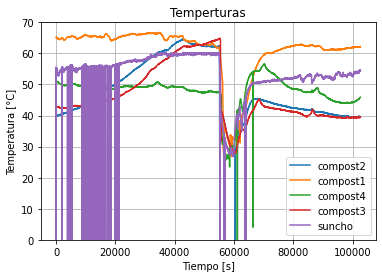

In [10]:
plt.figure("Temperaturas")
plt.title("Temperturas")
plt.plot(tiempos, temp_suncho, '-', markersize=1, label='compost2')
plt.plot(tiempos, temp_compost_1, '-', markersize=1, label='compost1')
plt.plot(tiempos, temp_compost_2, '-', markersize=1, label='compost4')
plt.plot(tiempos, temp_compost_3, '-', markersize=1, label='compost3')
plt.plot(tiempos, temp_compost_4, '-', markersize=1, label='suncho')
plt.legend()
plt.grid()
plt.ylim(0,70)
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.savefig(f"{PATH}/figuras/Temperatura.png")
plt.show()

In [12]:
np.where(temp_suncho=='Prendido')

(array([ 4688,  7537,  8195, 14690]),)

In [ ]:
4688/100

In [15]:
(5675*5)/60

472.9166666666667

In [16]:
2000/5

400.0

In [17]:
# 200 - 1800
serie1 = co2[60:600]
# 2100 - 3600
#serie2 = 
# 3900 - 5400
#serie3 = 
# 5600 - 7200
#serie4 = 

No handles with labels found to put in legend.


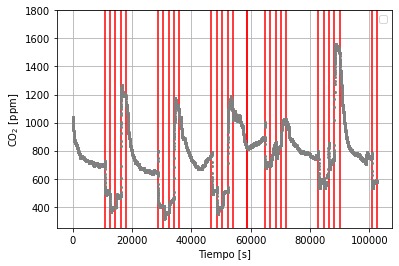

In [25]:
plt.figure("CO2")
#plt.title("CO2")
plt.plot(tiempos, co2, ".", color="grey", markersize=4)
#plt.plot(tiempos, co2, "o", color="blue", label="TPS")
#plt.plot(tiempos, co2, "o", color="orange", label="Celulosa")
#plt.plot(tiempos, co2, "o", color="green", label=r"TPS/NP-$\mathrm{TiO_2}$")
#plt.plot(tiempos, co2, "o", color="red", label="Blanco")
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=5000, color="red")
plt.grid()
plt.legend()
plt.xlabel("Tiempo [s]")
plt.ylabel(r"$\mathrm{CO_2}$ [ppm]")

plt.ylim(250,1800)

plt.savefig(f"{PATH}/figuras/CO2_completo.png")
plt.show()

In [18]:
#ELIMINAR LOS WARNING: CLEARING BYTE
#Para 2022-03-24_15-05 : 111,244,48
#Para 2022-03-25_07-30-02 : 191,175,124,17

falla=np.where(co2 == '!Warning: Clearing Byte: 17')[0][0] 

co2[falla]=co2[falla-1]

In [25]:
falla/100

56.75

# Integración

In [26]:
inicio = [] # Posición para empezar a medir el área
fin = []
for i in range(len(pos) - 1):
    if pos[i + 1] - pos[i] < 500:
        inicio.append(pos[i] + 60) # Dejamos 60 posiciones (5 minutos aprox) de espera
        fin.append(pos[i + 1])

In [35]:
tiempos[inicio[12]]

59161.0

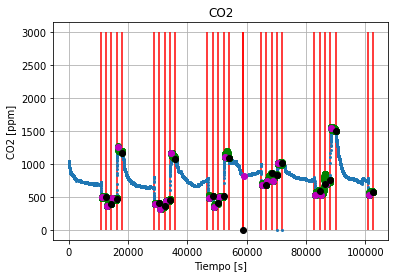

In [29]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".", markersize=4)
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=3000, color="r")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("CO2 [ppm]")

#plt.ylim(1800,2100)
#plt.xlim(26500,29000)

plt.scatter(tiempos[inicio], co2[inicio], color="m", zorder=4) #marco el inicio de cada área en color magenta
plt.scatter(tiempos[fin], co2[fin], color="k", zorder=5) #marco el fin de cada área en color negro
for i in range(len(inicio)):
    plt.scatter(tiempos[inicio[i]:fin[i]], co2[inicio[i]:fin[i]], color="g", zorder=3)
    
plt.savefig(f"{PATH}/figuras/areas_pintadas.png")
plt.show()

In [30]:
#CALCULO UN VALOR PROMEDIO, Y SU ERROR
promedio=[]
promedio_std=[]
for i in range(len(inicio)):
    promedio.append(np.mean(co2[inicio[i]:fin[i]]))
    promedio_std.append(np.std(co2[inicio[i]:fin[i]]))

/home/caro/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/caro/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in long_scalars
  ret = ret / rcount
/home/caro/.local/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


ZeroDivisionError: division by zero

In [22]:
promedio1 = []
promedio2 = []
promedio3 = []
promedio4 = []

promedio_std1 = []
promedio_std2 = []
promedio_std3 = []
promedio_std4 = []

for i in range(int(len(promedio) / 4)):
    promedio1.append(promedio[4 * i])
    promedio2.append(promedio[4 * i + 1])
    promedio3.append(promedio[4 * i + 2])
    promedio4.append(promedio[4 * i + 3])
    
    promedio_std1.append(promedio_std[4 * i])
    promedio_std2.append(promedio_std[4 * i + 1])
    promedio_std3.append(promedio_std[4 * i + 2])
    promedio_std4.append(promedio_std[4 * i + 3])

a=np.transpose(np.array([np.arange(1,(int(len(promedio1)))+1,1),promedio1,promedio2,promedio3,promedio4]))
np.savetxt(f'{PATH}/figuras/promedio.csv', a, delimiter=', ', newline='\n', header='nro,promedio1,promedio2,promedio3,promedio4')

b=np.transpose(np.array([np.arange(1,(int(len(promedio_std1)))+1,1),promedio_std1,promedio_std2,promedio_std3,promedio_std4]))
np.savetxt(f'{PATH}/figuras/promedio_std.csv', b, delimiter=', ', newline='\n', header='nro,promedio_std1,promedio_std2,promedio_std3,promedio_std4')


In [23]:
promedio

[544.4898785425102,
 594.7692307692307,
 839.6963562753036,
 1738.761133603239,
 549.0971659919028,
 526.8016194331984,
 750.251012145749,
 1590.3481781376518]

La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [17]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(x): # Meter el área
    return F * x * 44 / (den * 60)

In [18]:
gramos(np.array(area1))

array([0.00020848, 0.00020921, 0.00020995, 0.00021039, 0.00017569,
       0.00021127, 0.00021142, 0.00021201, 0.00021363, 0.0002151 ,
       0.00021584, 0.00021643, 0.0001806 , 0.00021775, 0.00021908,
       0.00021981, 0.0002204 , 0.00022084, 0.00022114, 0.00022173,
       0.00018551, 0.0002232 , 0.00022349, 0.00022364, 0.00022408,
       0.00022438, 0.00022541, 0.00018907, 0.00022762, 0.00022791,
       0.00022806, 0.00022821, 0.0002285 , 0.00022894, 0.00022924,
       0.00019164, 0.00023086, 0.0002313 , 0.00023159, 0.00023203,
       0.00023233, 0.00023248, 0.00019397, 0.00023321, 0.00023351,
       0.00023351, 0.00023336, 0.00023336, 0.00023351, 0.0002338 ,
       0.0001952 , 0.00023439, 0.00023439, 0.00023439, 0.00023409,
       0.00023365, 0.00023336, 0.00019434, 0.00023321, 0.00023321,
       0.00023336, 0.00023351, 0.00023351, 0.00023351, 0.00023351,
       0.00019459, 0.00023351, 0.00023351, 0.00023321, 0.00023277,
       0.00023248, 0.00023248, 0.00019385, 0.00023277, 0.00023